# Inference of Gene Regulatory Network using Kinetic Ising Model


In [1]:
from datetime import date

print("Last run date:", date.today())

Last run date: 2023-05-11


In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('../')

import lib.NetAnalysis as na
import lib.fun_plotting as fun_plotting
import lib.funcs_general as funcs_general
import lib.funcs_IsingPars as funcs_Ising
import lib.funcs_sanity as funcs_sanity

%load_ext autoreload
%autoreload 2

# matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
# matplotlib.rc('text', usetex=True)

matplotlib.rc('text', usetex=True)
sns.set(font='Avenir')
sns.set(style="white")

# Initial information

In [3]:
path      = "/Users/cleliacorridori/Dropbox_2021 Dropbox/Jorah Mormont/GRN_Inference/GRN_Inference_CODE/" 
path_data = "/Users/cleliacorridori/Dropbox_2021 Dropbox/Jorah Mormont/GRN_Inference/DATA/"

In [4]:
# genes of OUR dataset
genes_order = np.loadtxt(path_data+"general_info/genes_order.csv", dtype="str") #selected genes

# time steps
time=["00h", "06h", "12h", "24h", "48h"]

# Genes Classification
naive = ["Klf4", "Klf2", "Esrrb", "Tfcp2l1", "Tbx3", "Stat3", "Nanog", "Sox2"]
formative = ["Nr0b1", "Zic3", "Rbpj", "Utf1", "Etv4", "Tcf15"]
committed = ["Dnmt3a", "Dnmt3b", "Lef1", "Otx2", "Pou3f1", "Etv5"]



# Norm Data

In [5]:
# # load the Gene Expression data Log Normalized: the columns are the cells and the rows are the genes
# df_lN = pd.read_csv(path_data + "GE_data/imp_genes_logNorm.csv", header=0, index_col=0, sep=",").reindex(genes_order)
# df_lN.index.name=None

# df_lN.head(3)

# # load the Gene Expression data Psi Normalized: the columns are the cells and the rows are the genes
# df_pN = pd.read_csv(path_data + "GE_data/imp_genes_PsiNorm.csv", header=0, index_col=0, sep=",").reindex(genes_order)
# df_pN.index.name = None

# df_pN.head(3)


## Pseudotime

In [6]:
# # load the Gene Expression data log normalized: the columns are the cells and the rows are the genes
# df_lN_pst= pd.read_csv(path_data + "GE_data/processed/imp_genes_LogNorm_PST.csv", header=0, index_col=0, sep=",")


# # load the Gene Expression data Psi Normalized: the columns are the cells and the rows are the genes
# df_pN_pst= pd.read_csv(path_data + "GE_data/processed/imp_genes_PsiNorm_PST.csv", header=0, index_col=0, sep=",")

# df_pN_pst.head(3)

## PST + MB

In [7]:
# # Window size for Mini-Bulk
# mb_wind = 150

# # Threshold for half max
# thr = 0.5 

In [8]:
# # Mini-Bulk
# # load the Gene Expression data log normalized + Pseudo-Time: the columns are the cells and the rows are the genes
# df_lN_mb_pst = pd.read_csv(path_data + "GE_data/processed/imp_genes_LogNorm_PST_MB.csv", header=0, index_col=0, sep=",")

# # load the Gene Expression data Psi Normalized + Pseudo-Time: the columns are the cells and the rows are the genes
# df_pN_mb_pst = pd.read_csv(path_data + "GE_data/processed/imp_genes_PsiNorm_PST_MB.csv", header=0, index_col=0, sep=",")


# print("LogNorm dims: ", df_lN_mb_pst.shape, "\nPsiNorm dims: ", df_pN_mb_pst.shape)

# Binarization (Half-max)

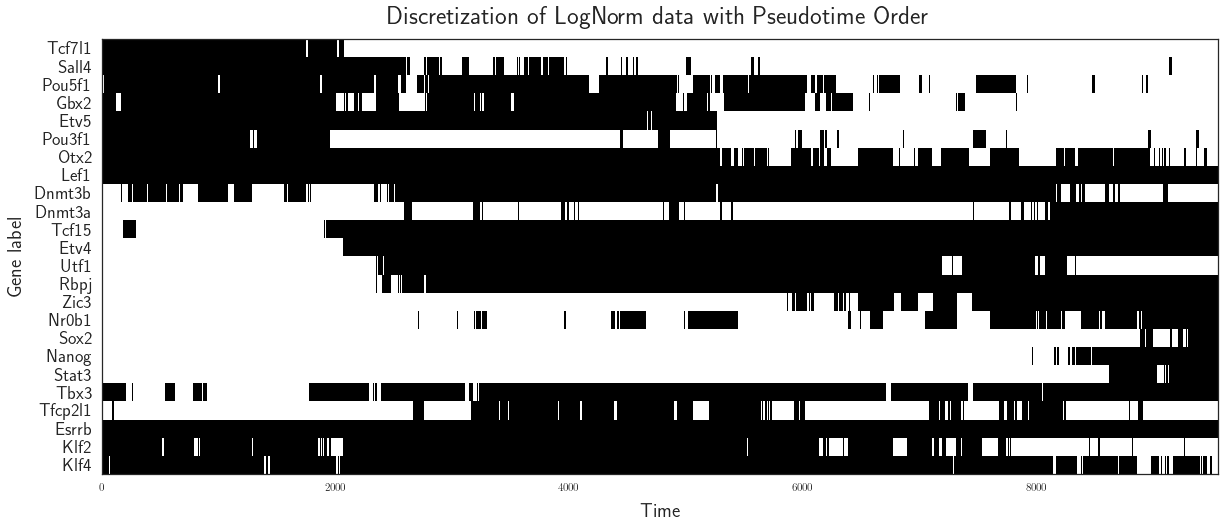

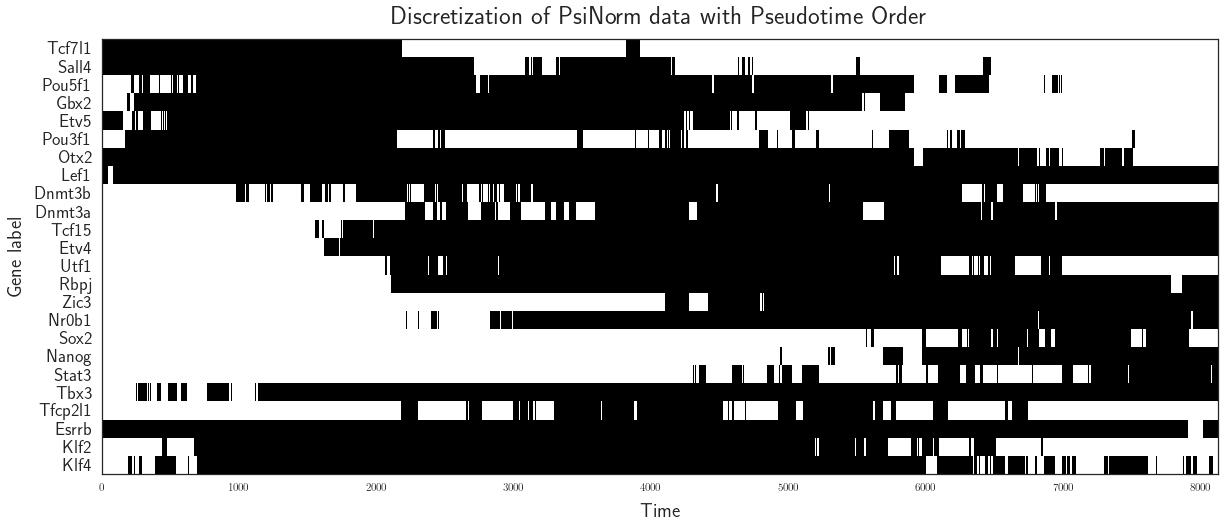

In [9]:
spins_df_lN_mb_pst = pd.read_csv(path_data + "GE_data/processed/imp_genes_LogNorm_PST_MB_Spins.csv", header=0, index_col=0, sep=",")

fun_plotting.raster_plot(np.array(spins_df_lN_mb_pst), 'Discretization of LogNorm data with Pseudotime Order', 1, genes_order[::-1])
plt.show()


spins_df_pN_mb_pst = pd.read_csv(path_data + "GE_data/processed/imp_genes_PsiNorm_PST_MB_Spins.csv", header=0, index_col=0, sep=",")

fun_plotting.raster_plot(np.array(spins_df_pN_mb_pst), 'Discretization of PsiNorm data with Pseudotime Order', 1, genes_order[::-1])
plt.show()



# Randomization

In [10]:
spins_df_lN_mb_pst_shuffle = np.load(path_data + "GE_data/processed/imp_genes_LogNorm_PST_MB_Spins_RND50Test.npy")
spins_df_pN_mb_pst_shuffle = np.load(path_data + "GE_data/processed/imp_genes_PsiNorm_PST_MB_Spins_RND50Test.npy")
 
Ntest = spins_df_lN_mb_pst_shuffle.shape[0] 


In [11]:
check=True
if check:
    # Check the reshuffle
    print(funcs_general.check_shuffle(spins_df_lN_mb_pst_shuffle, Ntest))
    print(funcs_general.check_shuffle(spins_df_pN_mb_pst_shuffle, Ntest))
    
    # zero expected if everithing is working fine

0.0
0.0


In [12]:
show = False
if show:
    for ii in range(0, Ntest, 60):
            fun_plotting.raster_plot(np.array(spins_df_lN_mb_pst_shuffle[ii,:,:]), 'Discretization of LogNorm data with PST - RND '+str(ii+1), 1, genes_order[::-1])
            plt.show()    
            fun_plotting.raster_plot(np.array(spins_df_pN_mb_pst_shuffle[ii,:,:]), 'Discretization of PsiNorm data with PST - RND '+str(ii+1), 1, genes_order[::-1])
            plt.show() 
            

# Known Experimentally

## Neighbours interactions

In [13]:
TPtrial_list = ["Stat3 Klf4 1", "Nanog Esrrb 1", "Stat3 Dnmt3b -1", 
                "Nanog Otx2 -1", "Nanog Pou3f1 -1",
                "Stat3 Gbx2 1", "Stat3 Tfcp2l1 1", 
                "Otx2 Pou3f1 1", "Otx2 Dnmt3a 1", 
                "Tcf7l1 Esrrb -1", "Tcf7l1 Klf2 -1", "Tcf7l1 Nanog -1", "Tcf7l1 Nr0b1 -1",  "Tcf7l1 Tfcp2l1 -1",  
                "Rbpj Nanog -1", "Rbpj Tbx3 -1", "Etv5 Lef1 1", "Etv5 Pou3f1 1"]


## Directed Correlations

In [14]:
df_KO_N24_Leeb_cl = pd.read_csv(path_data+'Leeb_Data_Orig/df_KO_N24_cleaned.csv', index_col=0, header=0)

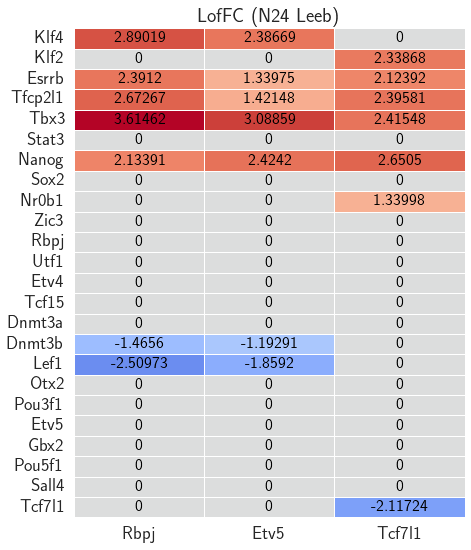

In [15]:
correlations_list = funcs_general.InteractionList(df_KO_N24_Leeb_cl, perc = 0.3)

fun_plotting.plot_log2FC(df_KO_N24_Leeb_cl, "LofFC (N24 Leeb)")

# Grid search for _hyperparameters_

In [16]:
params = {"LAMBDA" : [0.01, 0.02, 0.03,0.04, 0.05, 0.07, 0.09],
          "lr"     : [0.8, 0.7, 0.6, 0.5, 0.4, 0.3],
          "drop"   : [0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99],
          "edrop"  : [15, 20, 25, 30, 35],
          "opt"    : ['MOMENTUM','NADAM'], 
          "MOM"    : [0.75, 0.8, 0.85, 0.9, 0.95, 0.99],
          "reg"    : ['L1'],
          "Nepochs": [500, 700, 800, 900, 1200]}


# Implementation for the Real Data

In [17]:
interaction_thr = 0.0

Ntrials = 250
compute = False ######## CHANGE THIS TO TRUE TO COMPUTE THE RESULTS

today = "thr0_23_05_09" #or other data
data_type = "pst_mb"

In [18]:
if compute:
    lN_matx_sel_true, lN_prec_sel_true, lN_int_val_true = funcs_Ising.grid_search(np.array(spins_df_lN_mb_pst), params, TPtrial_list, 
                                                                    genes_order, Ntrials = Ntrials, seedSet=20961, 
                                                                            Norm=True, thr=interaction_thr, frac_thr=True)
    pN_matx_sel_true, pN_prec_sel_true, pN_int_val_true = funcs_Ising.grid_search(np.array(spins_df_pN_mb_pst), 
                                                                      params, TPtrial_list, 
                                                                      genes_order, Ntrials = Ntrials, seedSet=210997,   #101059, 
                                                                      Norm=True, thr=interaction_thr, frac_thr=True)
else: 
    # LOADING the data    
    today = "thr0_23_05_09" #or other data
    lN_arrays = np.load(path_data+'OUT_ISING/LogNORM/lN_arrays_'+data_type+'_'+str(today)+'.npz')#+'_thr'+str(interaction_thr*100)+'.npz')
    lN_matx_sel_true = lN_arrays['array_1']
    lN_prec_sel_true = lN_arrays['array_2']
    lN_int_val_true = lN_arrays['array_3']
    
    today = "thr0_23_05_11" #or other data    
    pN_arrays = np.load(path_data+'OUT_ISING/PsiNORM/pN_arrays_'+data_type+'_'+str(today)+'.npz')#+'_thr'+str(interaction_thr*100)+'.npz')
    pN_matx_sel_true = pN_arrays['array_1']
    pN_prec_sel_true = pN_arrays['array_2']
    pN_int_val_true =  pN_arrays['array_3']


In [31]:
# To save the inferred matrices, precisions and interaction info
today = "thr0_23_05_11"
saving = False
if saving:
    # np.savez(path_data + 'OUT_ISING/LogNORM/lN_arrays_pst_mb_thr0_23_05_10.npz', array_1=lN_matx_sel_true, array_2=lN_prec_sel_true, array_3=lN_int_val_true)
    np.savez(path_data + 'OUT_ISING/PsiNORM/pN_arrays_pst_mb_'+str(today)+'.npz', array_1=pN_matx_sel_true, array_2=pN_prec_sel_true, array_3=pN_int_val_true)


In [19]:
lN_TP_max = lN_prec_sel_true.max()
pN_TP_max = pN_prec_sel_true.max()
print("LogNorm PST max: ", lN_TP_max)
print("PsiNorm PST max: ", pN_TP_max)


LogNorm PST max:  0.7777777777777778
PsiNorm PST max:  0.8333333333333334


## LogNorm 

In [20]:
interaction_thr = 0.0

prova, high_idx:  [ 33  56  77  92 117]
Index of the model that satisfied the condition, [ 33  56  77  92 117]


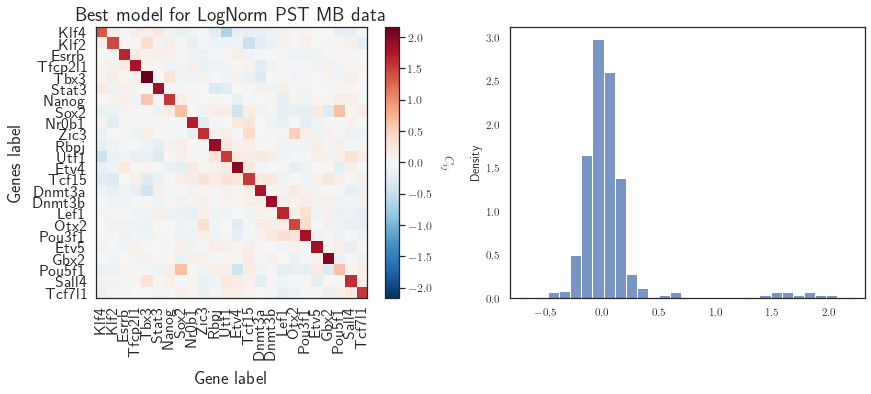

Result, 0.78
Threshold value : 0.000, max:  2.1696330505615147


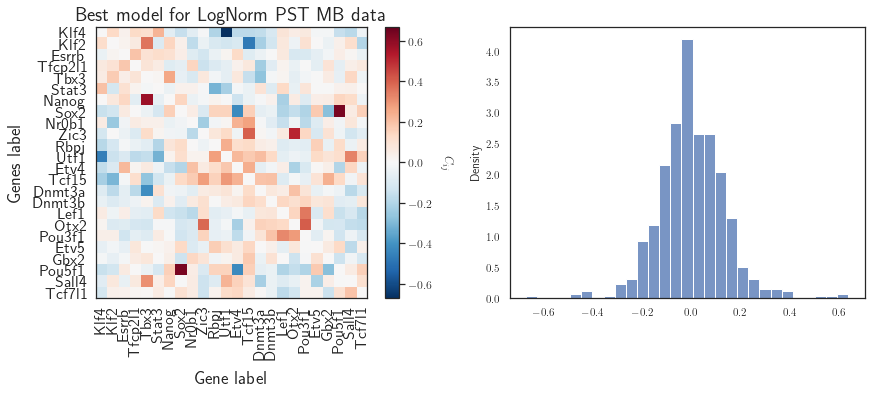

In [22]:
lN_high_meanMatx, lN_model_idxs = funcs_general.Inferred_matrix(lN_prec_sel_true, lN_matx_sel_true, TPtrial_list, genes_order, 
                                                                interaction_thr, "LogNorm PST MB",
                                                                stop = False, idx_sel=3)
# infos about the best model
print("Index of the model that satisfied the condition," ,lN_model_idxs)
# print("N Used Matrices", len(lN_model_idxs))

# evaluate the best model
lN_Mean_TP_frac, lN_Mean_info_int, _ = funcs_general.TP_plot(TPtrial_list, lN_high_meanMatx, genes_order, 
                                                   inferred_int_thr=interaction_thr, Norm_Matx = False,
                                                   data_type=" Best model for LogNorm PST MB data",
                                                   figplot=True, verbose=False, nbin=30, Norm = True)
print("Result, {0:.2f}".format(lN_Mean_TP_frac))
lN_interaction_thr = np.max(np.abs(lN_high_meanMatx))*interaction_thr
print(f"Threshold value : {'{:.3f}'.format(lN_interaction_thr)}, max: ", np.max(np.abs(lN_high_meanMatx)))

# print("Not Normalized interactions", np.round(lN_Mean_info_int[2,:],2))
# print("Not Normalized TRUE interactions\n", np.round(lN_Mean_info_int[2,:]*lN_Mean_info_int[3,:],3))
# print("Normalized TRUE interactions", np.round(lN_Mean_info_int[2,:]*lN_Mean_info_int[3,:]/np.max(np.abs(lN_high_meanMatx)), 2))
# print("Normalized interactions", np.round(lN_Mean_info_int[2,:]/np.max(np.abs(lN_high_meanMatx)), 2))


# lN_high_meanMatx_thr = na.to_thr_matrix(lN_high_meanMatx, thr=interaction_thr)
# lN_discarded_ints = (len(np.where(lN_high_meanMatx_thr==0)[0])-len(np.where(lN_high_meanMatx==0)[0]))/((len(genes_order))**2)
# print(f"Discarded Interactions : {'{:.3f}'.format(lN_discarded_ints*100)}%")

# to save information about the best model for LogNorm PST MB data
saving = False
text = "_thr"+str(int(interaction_thr*100))+"_"
if saving:
    np.save(path_data + "OUT_ISING/LogNORM/LogNorm_InferredMatrix_"+today+".npy", lN_high_meanMatx)
    np.save(path_data + "OUT_ISING/LogNORM/LogNorm_TPfrac_"+today+".npy", lN_Mean_TP_frac)
    np.save(path_data + "OUT_ISING/LogNORM/LogNorm_info_ints_"+today+".npy", lN_Mean_info_int)

lN_high_meanMatx_noDiag = lN_high_meanMatx.copy()
np.fill_diagonal(lN_high_meanMatx_noDiag, 0)
lN_Mean_TP_frac, lN_Mean_info_int, _ = funcs_general.TP_plot(TPtrial_list, lN_high_meanMatx_noDiag, genes_order, 
                                                   inferred_int_thr=interaction_thr, Norm_Matx = False,
                                                   data_type=" Best model for LogNorm PST MB data",
                                                   figplot=True, verbose=False, nbin=30, Norm = True)

## PsiNorm

In [26]:
today = "thr0_23_05_11" #or other data

prova, high_idx:  [223 230]
Index of the model that satisfied the condition, [223 230]

RESULTS for  Best model for PsiNorm PST MB data

TP fraction: 0.83

Interaction values:
 [ 0.019  0.005 -0.02  -0.015 -0.     0.008  0.003  0.007  0.018  0.057
 -0.    -0.    -0.001  0.008 -0.01  -0.01  -0.005  0.   ]

TP ints values:
 [ 0.019  0.005 -0.02  -0.015 -0.     0.008  0.003  0.007  0.018  0.
 -0.    -0.    -0.001  0.    -0.01  -0.01  -0.     0.   ]


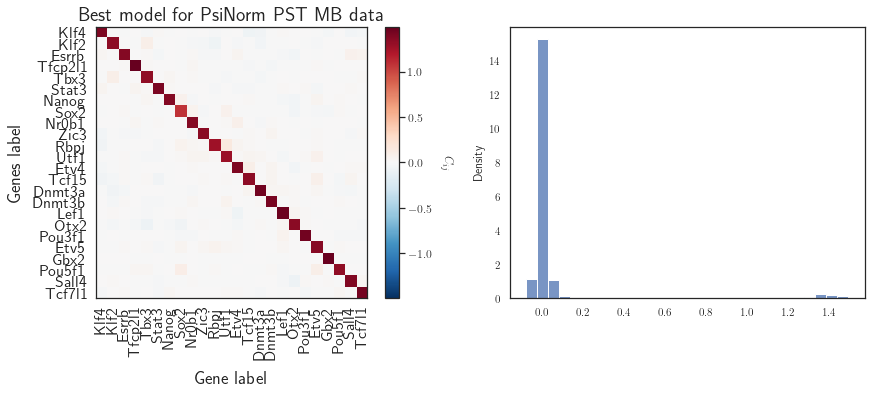

Result TP frac, 0.83
Discarded Interactions : 0.000%


In [29]:
pN_high_meanMatx, pN_model_idxs = funcs_general.Inferred_matrix(pN_prec_sel_true, pN_matx_sel_true, TPtrial_list, 
                                                                genes_order, interaction_thr, "PsiNorm PST MB", stop=False)

# infos about the best model
print("Index of the model that satisfied the condition," ,pN_model_idxs)
# print("N Used Matrices", len(pN_model_idxs))

# evaluate the best model
pN_Mean_TP_frac, pN_Mean_info_int, _ = funcs_general.TP_plot(TPtrial_list, pN_high_meanMatx, genes_order, 
                                                   inferred_int_thr=interaction_thr, Norm_Matx = False,
                                                   data_type=" Best model for PsiNorm PST MB data",
                                                   figplot=True, verbose=True, nbin=30, Norm = True)
print("Result TP frac, {0:.2f}".format(pN_Mean_TP_frac))

pN_high_meanMatx_thr = na.to_thr_matrix(pN_high_meanMatx, thr=interaction_thr)
pN_discarded_ints = (len(np.where(pN_high_meanMatx_thr==0)[0])-len(np.where(pN_high_meanMatx==0)[0]))/((len(genes_order))**2)
print(f"Discarded Interactions : {'{:.3f}'.format(pN_discarded_ints*100)}%")


# to save information about the best model for LogNorm PST MB data
saving = False
if saving:
    np.save(path_data + "OUT_ISING/PsiNORM/PsiNorm_InferredMatrix_"+today+".npy", pN_high_meanMatx)
    np.save(path_data + "OUT_ISING/PsiNORM/PsiNorm_TPfrac_"+today+".npy", pN_Mean_TP_frac)
    np.save(path_data + "OUT_ISING/PsiNORM/PsiNorm_info_ints_"+today+".npy", pN_Mean_info_int)

In [43]:
# check number of zeros in pN_high_meanMatx
print("Number of zeros in pN_high_meanMatx", len(np.where(pN_high_meanMatx == 0)[0])/24**2)

Number of zeros in pN_high_meanMatx 0.0


threshold having the frac 0.0009122368969614905
check fraction of interactions 0.010416666666666666

RESULTS for  Best model for PsiNorm PST MB data

TP fraction: 0.61

Interaction values:
 [ 0.5    0.422  0.153 -0.286 -0.575 -0.496 -0.123 -0.163 -0.14   0.125
 -0.141 -0.077 -0.215 -0.3   -0.274 -0.543 -0.401  0.946]

TP ints values:
 [ 0.5    0.422  0.    -0.286 -0.575 -0.    -0.    -0.    -0.     0.
 -0.141 -0.077 -0.215 -0.3   -0.274 -0.543 -0.     0.946]


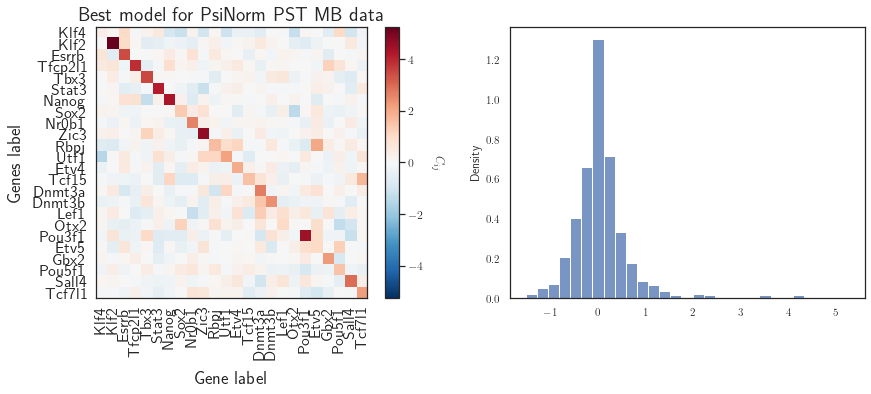

Result, 0.61


In [28]:
frac_ints_small = 0.01 # 1% of the interactions, the smallest in absolute value
thr_check = np.percentile(np.abs(pN_high_meanMatx), frac_ints_small*100)/np.nanmax(np.abs(pN_high_meanMatx))
print("threshold having the frac", thr_check)

thr_test = thr_check
A_test = pN_high_meanMatx.copy()
A_test[np.abs(A_test) <  (thr_test*np.nanmax(np.abs(A_test)))] = 0
# plt.imshow(A_test, cmap="bwr")
frac_ints_small = len(np.where(A_test == 0)[0])/(24*24)
print("check fraction of interactions", frac_ints_small)

# evaluate the best model
pN_Mean_TP_frac, pN_Mean_info_int, _ = funcs_general.TP_plot(TPtrial_list, pN_high_meanMatx, genes_order, 
                                                   inferred_int_thr=0, Norm_Matx = False,
                                                   data_type=" Best model for PsiNorm PST MB data",
                                                   figplot=True, verbose=True, nbin=30, Norm = True)
print("Result, {0:.2f}".format(pN_Mean_TP_frac))

# Implementation for reshuffled data

In [23]:
Ntrials = 50  # on the parameters
Ntest   = 50  # on the datasets
compute = True

if compute:
    pN_matx_sel_rnd = np.zeros((Ntest, Ntrials, len(genes_order), len(genes_order)))
    lN_matx_sel_rnd = np.zeros((Ntest, Ntrials, len(genes_order), len(genes_order)))

    pN_prec_sel_rnd = np.zeros((Ntest, Ntrials))
    lN_prec_sel_rnd = np.zeros((Ntest, Ntrials))

    pN_int_val_rnd  = np.zeros((4, len(TPtrial_list), Ntrials, Ntest))
    lN_int_val_rnd  = np.zeros((4, len(TPtrial_list), Ntrials, Ntest))

    for ii in range(Ntest):
        print("\n Testing Sample "+str(ii+1))
        pN_matx_sel_rnd[ii,:,:,:], pN_prec_sel_rnd[ii, :], pN_int_val_rnd[:, :, :, ii] = funcs_Ising.grid_search(np.array(spins_df_pN_mb_pst_shuffle[ii,:,:]), 
                                                                                                        params, TPtrial_list, 
                                                                                                        genes_order, seedSet=ii*2, 
                                                                                                        Ntrials = Ntrials,
                                                                                                        Norm=True, thr=0)
        
        lN_matx_sel_rnd[ii,:,:,:],  lN_prec_sel_rnd[ii, :],  lN_int_val_rnd[:, :, :, ii]  = funcs_Ising.grid_search(np.array(spins_df_lN_mb_pst_shuffle[ii,:,:]), 
                                                                                                        params, TPtrial_list, 
                                                                                                        genes_order, seedSet=ii*2, 
                                                                                                        Ntrials = Ntrials,
                                                                                                        Norm=True, thr=0)
else:
    # LOADING the data
    pN_arrays_rnd = np.load(path_data+'OUT_ISING/PsiNORM/pN_arrays_pst_MB_RND_23_03_29.npz')
    pN_matx_sel_rnd = pN_arrays_rnd['array_1']
    pN_prec_sel_rnd = pN_arrays_rnd['array_2']
    pN_int_val_rnd =  pN_arrays_rnd['array_3']
    
    lN_arrays_rnd = np.load(path_data+'OUT_ISING/LogNORM/lN_arrays_pst_MB_RND_23_03_29.npz')
    lN_matx_sel_rnd = lN_arrays_rnd['array_1']
    lN_prec_sel_rnd = lN_arrays_rnd['array_2']
    lN_int_val_rnd = lN_arrays_rnd['array_3']

## Result

In [30]:
print(interaction_thr)
print(lN_interaction_thr)

print(pN_interaction_thr)

0.01
0.01301061143782115
0.010913036872426403


### Interaction distribution

quantiles [-0.018  0.     0.019]
quantiles [-0.02  0.    0.02]


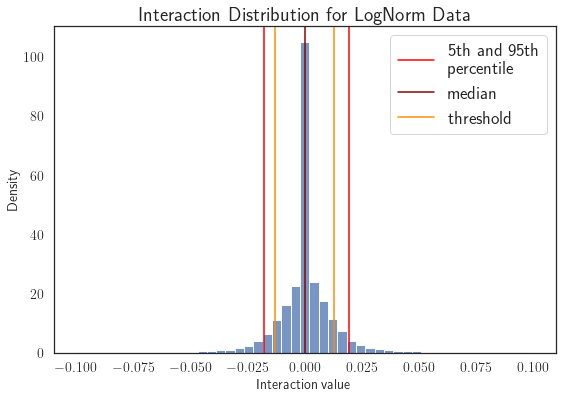

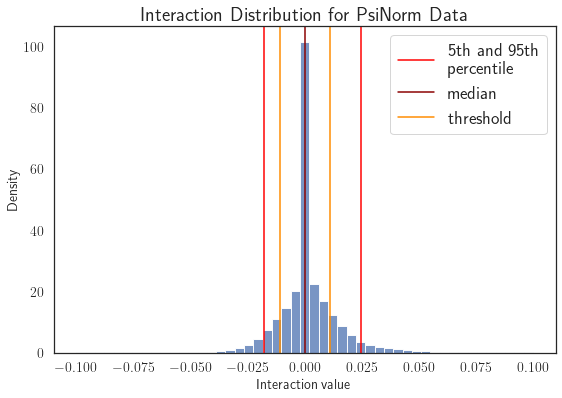

In [37]:
matplotlib.rc('text', usetex=True)
sns.set(font='Avenir')
sns.set(style="white")
matplotlib.rcParams['xtick.labelsize'] = 14
matplotlib.rcParams['ytick.labelsize'] = 14
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['axes.titlesize'] = 14
matplotlib.rcParams['legend.fontsize'] = 14
matplotlib.rcParams['figure.titlesize'] = 14

# LogNorm
lN_ints_rnd_all = lN_matx_sel_rnd.flatten()

plt.figure(figsize=(9,6))
bins = np.linspace(-0.1,0.1,50)
sns.histplot(lN_ints_rnd_all, bins=bins, stat="density")
plt.xlabel(xlabel='Interaction value', fontsize=14)
plt.axvline(x = np.quantile(lN_ints_rnd_all,[0.05, 0.5, 0.95])[0], color = 'red', label = '5th and 95th \npercentile')
plt.axvline(x = np.quantile(lN_ints_rnd_all,[0.05, 0.5, 0.95])[1], color = 'darkred', label = 'median')
plt.axvline(x = np.quantile(lN_ints_rnd_all,[0.05, 0.5, 0.95])[2], color = 'red')

plt.axvline(x = -lN_interaction_thr, color = 'darkorange', label = 'threshold')
plt.axvline(x =  lN_interaction_thr, color = 'darkorange')
plt.legend(fontsize=18)
plt.title("Interaction Distribution for LogNorm Data", fontsize=20)
print("quantiles", np.round(np.quantile(lN_ints_rnd_all,[0.05, 0.5, 0.95]),3))


# PsiNorm
pN_ints_rnd_all = pN_matx_sel_rnd.flatten()

plt.figure(figsize=(9,6))
bins = np.linspace(-0.1,0.1,50)
sns.histplot(pN_ints_rnd_all, bins=bins, stat="density")
plt.xlabel(xlabel='Interaction value', fontsize=14)
plt.axvline(x = np.quantile(pN_ints_rnd_all,[0.05, 0.5, 0.95])[0], color = 'red', label = '5th and 95th \npercentile')
plt.axvline(x = np.quantile(pN_ints_rnd_all,[0.05, 0.5, 0.95])[1], color = 'darkred', label = 'median')
plt.axvline(x = np.quantile(pN_ints_rnd_all,[0.05, 0.5, 0.95])[2], color = 'red')

plt.axvline(x = -pN_interaction_thr, color = 'darkorange', label = 'threshold')
plt.axvline(x =  pN_interaction_thr, color = 'darkorange')
plt.title("Interaction Distribution for PsiNorm Data", fontsize=20)
plt.legend(fontsize=18)
print("quantiles", np.round(np.quantile(pN_ints_rnd_all,[0.05, 0.5, 0.95]),2))


### Setting the TP threshold based on data

#### PsiNorm data

Number of test*trial TP frac: (4, 18, 2500)
[0.         0.11111111 0.44444444]


/Users/cleliacorridori/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


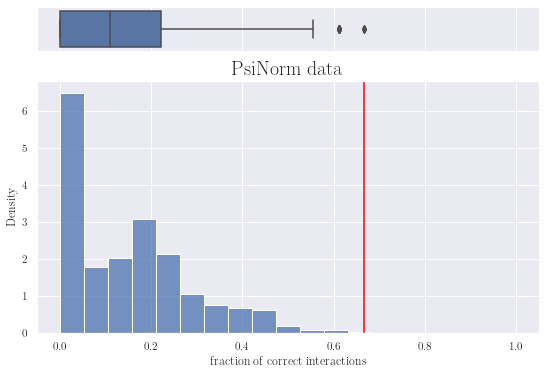

TP fraction for PsiNorm data:  0.6666666666666666


In [38]:
# print(raw_matx_sel_rnd.shape, raw_prec_sel_rnd.shape, raw_int_val_rnd.shape )
pN_int_val_rnd_all = pN_int_val_rnd.reshape((4,18,50*50))
print("Number of test*trial TP frac:", pN_int_val_rnd_all.shape)

pN_TPfrac_thr = np.zeros(pN_int_val_rnd_all.shape[2])
for kk in range(pN_int_val_rnd_all.shape[2]):
    pN_TPfrac_thr[kk]= len(np.where(np.abs(pN_int_val_rnd_all[2,:,kk]*pN_int_val_rnd_all[3,:,kk])>pN_interaction_thr)[0])/len(pN_int_val_rnd_all[2,:,kk])
    
# quartiles of ALL the random interactions
print(np.quantile(pN_TPfrac_thr,[0.05, 0.5, 0.95]))

sns.set(style="darkgrid")
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
matplotlib.rc('text', usetex=True)
# creating the figure containing the distribution and the box plot
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(9, 6))
 
# assigning a graph to each ax
sns.boxplot(pN_TPfrac_thr, ax=ax_box)
sns.histplot(pN_TPfrac_thr, ax=ax_hist, stat="density", bins=19, binrange = (0,1))
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
ax_hist.set(xlabel='fraction of correct interactions')
pN_TP_true_thr = len(np.where(np.abs(pN_Mean_info_int[2,:]*pN_Mean_info_int[3,:])>pN_interaction_thr)[0])/18
plt.axvline(x = pN_TP_true_thr, color = 'red', label = 'axvline - full height')
plt.title("PsiNorm data", fontsize=20)
plt.show()

sns.set_style("white")   

print("TP fraction for PsiNorm data: ", pN_TP_true_thr)

    

Number of test*trial TP frac: (4, 18, 2500)
[0.         0.05555556 0.38888889]
max 0.7777777777777778


/Users/cleliacorridori/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


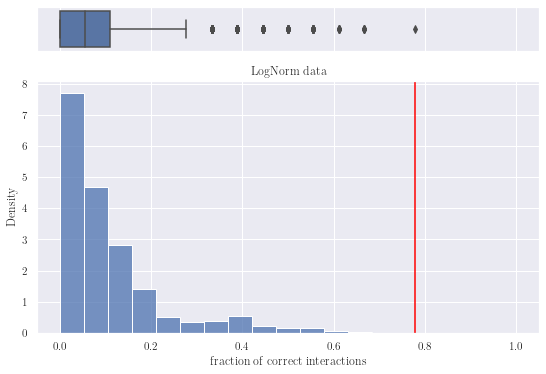

TP fraction for LogNorm data:  0.7777777777777778


In [40]:
# print(lN_matx_sel_rnd.shape, lN_prec_sel_rnd.shape, lN_int_val_rnd.shape )
lN_int_val_rnd_all = lN_int_val_rnd.reshape((4,18,50*50))
print("Number of test*trial TP frac:", lN_int_val_rnd_all.shape)

lN_TPfrac_thr = np.zeros(lN_int_val_rnd_all.shape[2])
for kk in range(lN_int_val_rnd_all.shape[2]):
    lN_TPfrac_thr[kk]= len(np.where(np.abs(lN_int_val_rnd_all[2,:,kk]*lN_int_val_rnd_all[3,:,kk])>lN_interaction_thr)[0])/len(lN_int_val_rnd_all[2,:,kk])
    
# quartiles of ALL the random interactions
print(np.quantile(lN_TPfrac_thr,[0.05, 0.5, 0.95]))
print("max", np.max(lN_TPfrac_thr))

# plot setting
sns.set(style="darkgrid")
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
matplotlib.rc('text', usetex=True)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(9, 6))
# plot
sns.boxplot(lN_TPfrac_thr, ax=ax_box)
sns.histplot(lN_TPfrac_thr, ax=ax_hist, stat="density", bins=19, binrange = (0,1))
# other plot stuff
ax_box.set(xlabel='')
ax_hist.set(xlabel='fraction of correct interactions')

lN_TP_true_thr = len(np.where(np.abs(lN_Mean_info_int[2,:]*lN_Mean_info_int[3,:])>lN_interaction_thr)[0])/18
plt.axvline(x = lN_TP_true_thr, color = 'red', label = 'axvline - full height')
plt.title("LogNorm data")
plt.show()

# reset of the plot style
sns.set_style("white")    

print("TP fraction for LogNorm data: ", lN_TP_true_thr)
    

#### True data

Index of the model that satisfied the condition,  147
[0.33333333 0.44444444 0.55555556]


/Users/cleliacorridori/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


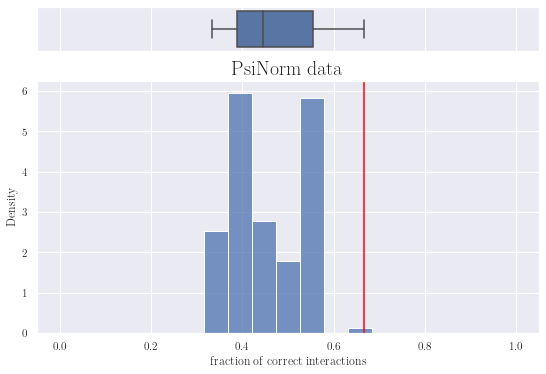

TP fraction for PsiNorm data: 0.67


In [42]:
pN_TPfrac_thr_true = np.zeros(pN_int_val_true.shape[2])
pN_idx_TPhigh_true = []
for kk in range(pN_int_val_true.shape[2]):
    pN_TPfrac_thr_true[kk]= len(np.where(np.abs(pN_int_val_true[2,:,kk]*pN_int_val_true[3,:,kk])>pN_interaction_thr)[0])/len(pN_int_val_true[2,:,kk])
    if pN_TPfrac_thr_true[kk]>=0.65:
        print("Index of the model that satisfied the condition, ", kk)
        pN_idx_TPhigh_true.append(kk)
        
    
# quartiles of ALL the random interactions
print(np.quantile(pN_TPfrac_thr_true,[0.05, 0.5, 0.95]))

sns.set(style="darkgrid")
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
matplotlib.rc('text', usetex=True)
# creating the figure containing the distribution and the box plot
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(9, 6))
 
# assigning a graph to each ax
sns.boxplot(pN_TPfrac_thr_true, ax=ax_box)
sns.histplot(pN_TPfrac_thr_true, ax=ax_hist, stat="density", bins=19, binrange = (0,1))
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
ax_hist.set(xlabel='fraction of correct interactions')
pN_TP_true_thr = len(np.where(np.abs(pN_Mean_info_int[2,:]*pN_Mean_info_int[3,:])>pN_interaction_thr)[0])/18
plt.axvline(x = pN_TP_true_thr, color = 'red', label = 'axvline - full height')
plt.title("PsiNorm data", fontsize=20)
plt.show()

sns.set_style("white")   

print(f"TP fraction for PsiNorm data: {pN_TP_true_thr:.2f}")


[0.22222222 0.55555556 0.66666667]


/Users/cleliacorridori/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


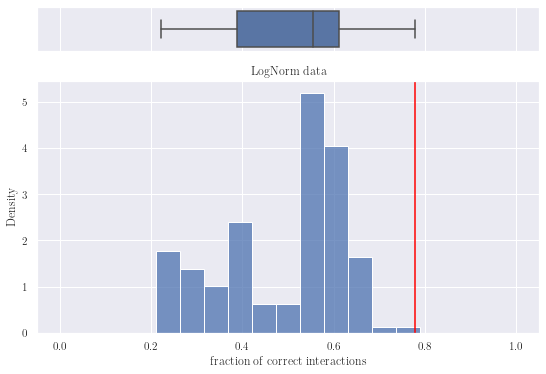

TP fraction for LogNorm data: 0.78


In [44]:
lN_TPfrac_thr_true = np.zeros(lN_int_val_true.shape[2])
lN_idx_TPhigh_true = []
for kk in range(lN_int_val_true.shape[2]):
    lN_TPfrac_thr_true[kk]= len(np.where(np.abs(lN_int_val_true[2,:,kk]*lN_int_val_true[3,:,kk])>lN_interaction_thr)[0])/len(lN_int_val_true[2,:,kk])
    if lN_TPfrac_thr_true[kk]>=0.6:
        lN_idx_TPhigh_true.append(kk)
        
    
# quartiles of ALL the random interactions
print(np.quantile(lN_TPfrac_thr_true,[0.05, 0.5, 0.95]))

sns.set(style="darkgrid")
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
matplotlib.rc('text', usetex=True)
# creating the figure containing the distribution and the box plot
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(9, 6))
 
# assigning a graph to each ax
sns.boxplot(lN_TPfrac_thr_true, ax=ax_box)
sns.histplot(lN_TPfrac_thr_true, ax=ax_hist, stat="density", bins=19, binrange = (0,1))
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
ax_hist.set(xlabel='fraction of correct interactions')
lN_TP_true_thr = len(np.where(np.abs(lN_Mean_info_int[2,:]*lN_Mean_info_int[3,:])>lN_interaction_thr)[0])/18
plt.axvline(x = lN_TP_true_thr, color = 'red', label = 'axvline - full height')
plt.title("LogNorm data")
plt.show()

sns.set_style("white")   

# print("TP fraction for lN data: ", lN_TP_true_thr)
print(f"TP fraction for LogNorm data: {lN_TP_true_thr:.2f}")


### Distibutions of known interactions

IN random:  Tcf7l1 Klf2 -1 -0.0010772644292068134


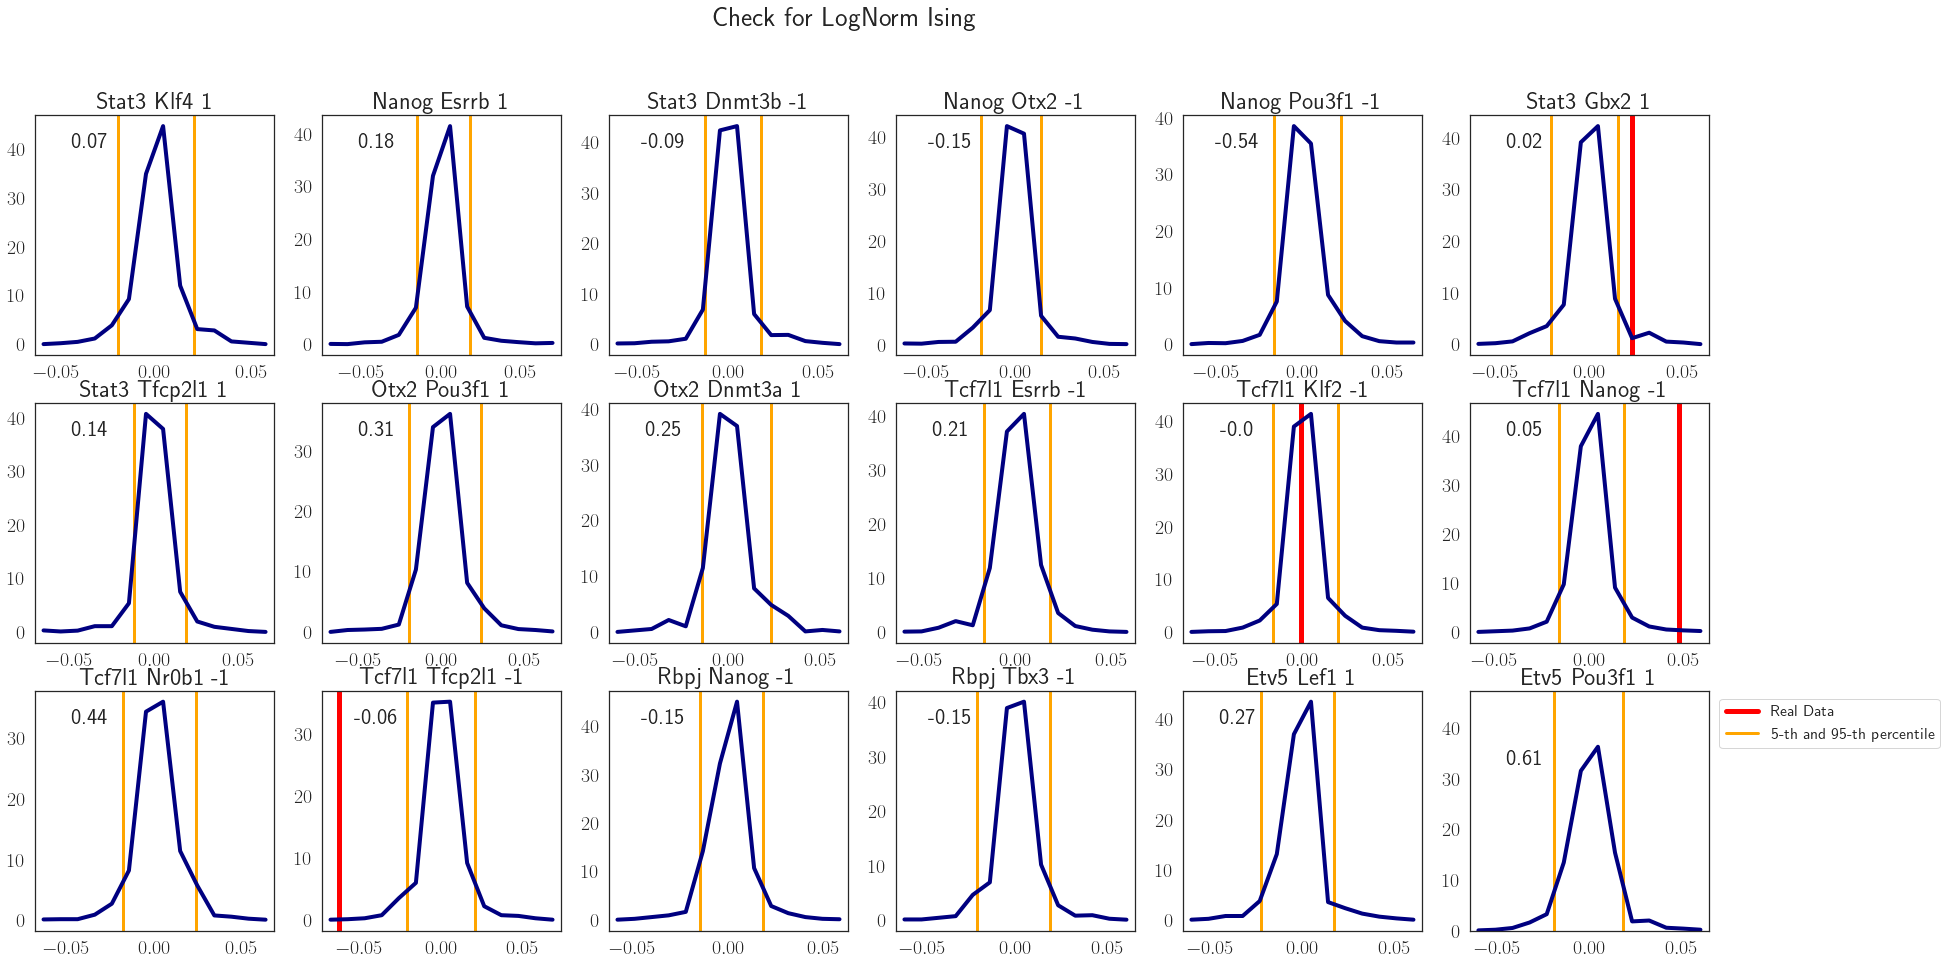

In [61]:
lN_matx_sel_rnd_all = lN_matx_sel_rnd.reshape((Ntrials*Ntest,len(genes_order),len(genes_order)))

funcs_sanity.single_int_check(TPtrial_list, lN_matx_sel_rnd_all, lN_Mean_info_int, genes_order, text="Check for LogNorm Ising")


IN random:  Tcf7l1 Klf2 -1 -0.01189788344763757


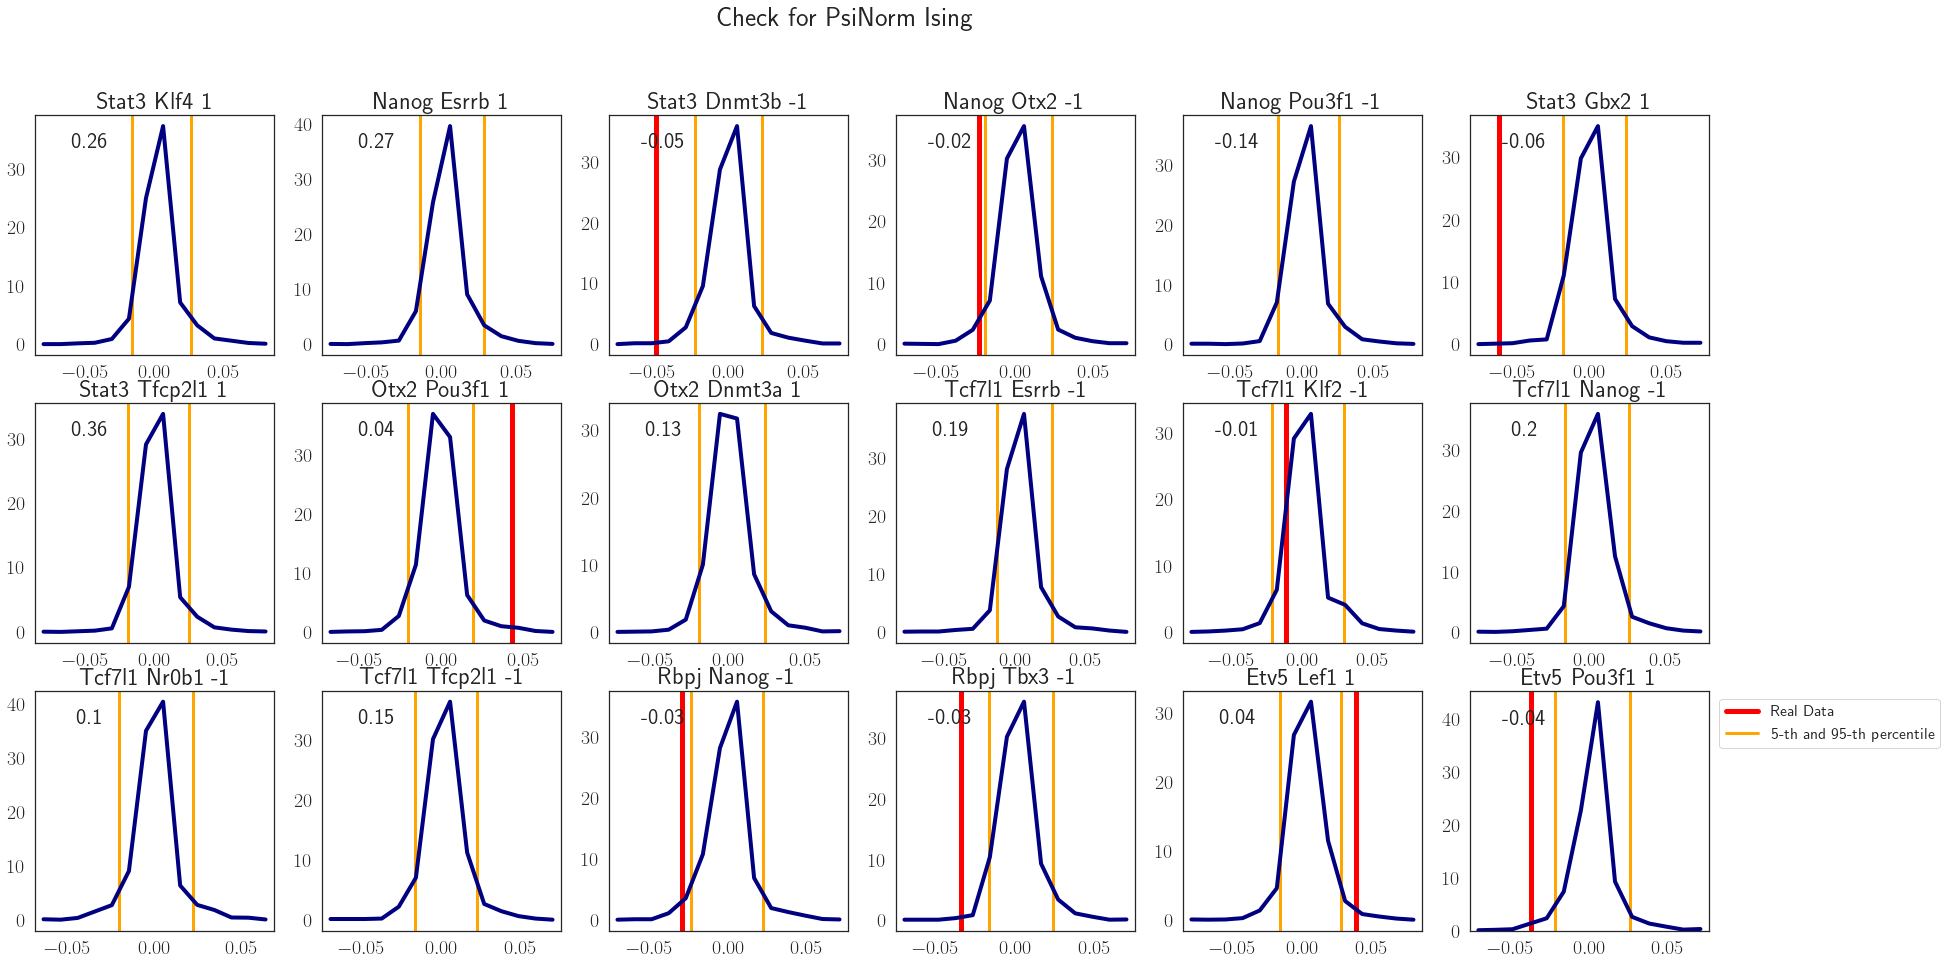

In [62]:
pN_matx_sel_rnd_all = pN_matx_sel_rnd.reshape((Ntrials*Ntest,len(genes_order),len(genes_order)))

funcs_sanity.single_int_check(TPtrial_list, pN_matx_sel_rnd_all, pN_Mean_info_int, genes_order, text="Check for PsiNorm Ising")



In [63]:
# to save RANDOM DATA
saving = False
if saving:
    # Raw TRUE data set
    np.savez(path_data+'OUT_ISING/PsiNORM/pN_arrays_pst_MB_RND_23_03_29.npz', array_1=pN_matx_sel_rnd, array_2=pN_prec_sel_rnd, array_3=pN_int_val_rnd)
    # LogNorm TRUE data set
    np.savez(path_data+'OUT_ISING/LogNORM/lN_arrays_pst_MB_RND_23_03_29.npz', array_1=lN_matx_sel_rnd, array_2=lN_prec_sel_rnd, array_3=lN_int_val_rnd)


In [64]:
# use vocal sound to know when the code is computed till here
# import os
# os.system('say "your program has finished"')